# Time Windows

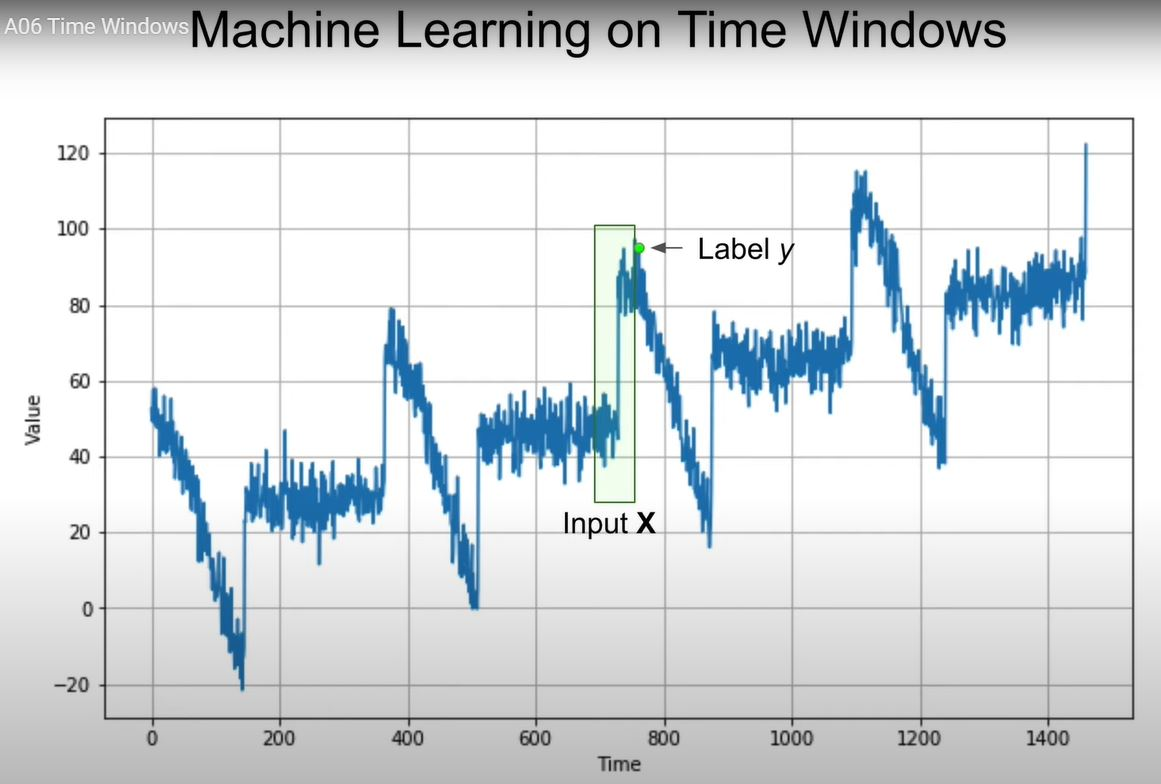

In [1]:
import tensorflow as tf

In [3]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift =1) #gets all possible windows of 5 steps
# this functions returns a new dataset containing windows. 
# each window is a dataset

for window_dataset in dataset:
    for val in window_dataset:
        print(val.numpy(), end = " ")
    print()

0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 
6 7 8 9 
7 8 9 
8 9 
9 


In [7]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift =1, drop_remainder = True)
#drop_remainder: removes all the incomplete windows

for window_dataset in dataset:
    for val in window_dataset:
        print(val.numpy(), end = " ")
    print()

0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 


In [6]:
# our ML models will still need datasets as tensors not as windows 
# So, let's convert these windows datasets to tensors 

dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift =1, drop_remainder = True)
dataset = dataset.flat_map(lambda window: window.batch(5))
# flat_map method goes through all the elements of the nested datasets (returned by the window method)
# and returns the values of these elements one by one so you end up with a flat dataset
# the flatm_map method takes a function as a input - you can use this method to apply any transformation you want 
# In our case we want to group the elements of each window in order to get a single tensor 5 for each element

for window in dataset:
    print(window.numpy())
# Note: we do not need nested for loop now coz of grouping done in the flat_map method
# also each element is a tensor of size 5

[0 1 2 3 4] 
[1 2 3 4 5] 
[2 3 4 5 6] 
[3 4 5 6 7] 
[4 5 6 7 8] 
[5 6 7 8 9] 


In [11]:
# Our ML model will need input as well as labels - Lets do that here

dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift =1, drop_remainder = True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
# Creates a touple of x past values and y as a label

for x, y in dataset:
    print(x.numpy(), y.numpy())

[0 1 2 3] [4]
[1 2 3 4] [5]
[2 3 4 5] [6]
[3 4 5 6] [7]
[4 5 6 7] [8]
[5 6 7 8] [9]


In [13]:
# Gradient Descent works best when the instances in our dataset is IID - Independent and Identically Distributed
# So, let's shuffle all these windows so that each training batch contains fairly independent windows. - USE shuffle()

dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift =1, drop_remainder = True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size= 10)
# Shuffling -  so that each bloack contains the same variable of the data
# tiny shuffle buffer since our dataset is too small

for x, y in dataset:
    print(x.numpy(), y.numpy())

[4 5 6 7] [8]
[3 4 5 6] [7]
[0 1 2 3] [4]
[1 2 3 4] [5]
[2 3 4 5] [6]
[5 6 7 8] [9]


In [17]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift =1, drop_remainder = True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size= 10)
dataset = dataset.batch(2).prefetch(1)
# Since neural networks takes input in batches. We need to prepare batches of instance.
# prefetch - while the model is still woking on one batch of data the first, the dataset 
# will already be preparing the next batch of the data in parallel

for x, y in dataset:
    print(x.numpy(), y.numpy())
    print("_______________________")

[[1 2 3 4]
 [3 4 5 6]] [[5]
 [7]]
_______________________
[[5 6 7 8]
 [2 3 4 5]] [[9]
 [6]]
_______________________
[[4 5 6 7]
 [0 1 2 3]] [[8]
 [4]]
_______________________


In [16]:
### Now, let's wrap the code into a function 
def window_dataset(series, window_size, batch_size =32):
    ds = tf.data.Dataset.from_tensor_slices(series)
    # Creates a dataframe where each item corresponds to 1 time step from the given time series
    
    ds= ds.window(window_size +1,
                  shift = 1, 
                  drop_remainder = True)
    
    ds = ds.flat_map(lambda w: w.batch(window_size +1))
    ds = ds.map(lambda w: (w.batch(window_size +1)))
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    ds = ds.shuffle(len(series))
    
    return ds.batch(batch_size).prefetch(1)
                  
    